# Composition of the Classics

English literature classes across the country, especially in high schools, are surprisingly standardized. Students from California to New York can complain about being forced to read novels such as *Jane Eyre* and *The Scarlet Letter*, whether they finish the book liking it or not. Only certain books, referred to as “classics”, are encouraged to be included in these types of classes. Generally, the classics were not published recently, and are often old enough to be out of copyright in the United States. The age of the books brings to question their relevance: are century-old books even worth analyzing? Clearly, the literary community has judged that these works have some intrinsic value. Otherwise, there would be no need to classify some works as classics and forget others. Therefore, classics have an impact beyond just the time period they were written in. But what makes them impactful? Are there certain characteristics that can indicate whether a book is likely to be considered a classic or not?

In [47]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
from IPython.display import HTML, display
import requests
import time
import statistics
import scipy as sp
from collections import Counter
from wordcloud import WordCloud
import numpy as np
from sklearn.linear_model import LinearRegression

In [48]:
# converting csv to dataframe
classics = pd.read_csv("classics.csv")
classics

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,en,NaN,The Reluctant Heroes,Text,0,51483,1002,https://www.gutenberg.org/ebooks/51483,1926,...,0.076203,0.451757,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,en,NaN,"Film Truth; September, 1920",Text,0,51484,1003,https://www.gutenberg.org/ebooks/51484,0,...,0.143879,0.485782,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,en,NaN,Othmar,Text,0,51487,1004,https://www.gutenberg.org/ebooks/51487,1839,...,0.099478,0.548289,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,en,NaN,Church History (Volumes 1-3),Text,0,51491,1005,https://www.gutenberg.org/ebooks/51491,1809,...,0.112242,0.440014,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


In [49]:
# cleaning- no need for language, type, PG metadata(.id, .downloads, .url, .formats.total/.types)
# renaming columns for readability
classics.drop(columns = ["bibliography.languages", "bibliography.type", "metadata.id", "metadata.url", "metadata.formats.total",
                         "metadata.formats.types", "bibliography.publication.day", "bibliography.publication.full", "bibliography.publication.month",
                         "bibliography.publication.month name", "metrics.sentiments.polarity", "metrics.sentiments.subjectivity"], inplace = True)

classics = classics.rename(columns={"bibliography.congress classifications": "LCC", "bibliography.subjects": "subjects",
                         "bibliography.title": "title", "bibliography.author.name": "author", "bibliography.publication.year": "pubyear",
                         "metadata.downloads": "downloads", "bibliography.author.birth": "author.birth", "bibliography.author.death": "author.death",
                         "metrics.difficulty.automated readability index": "ARI", "metrics.difficulty.coleman liau index": "CLI",
                         "metrics.difficulty.flesch kincaid grade": "FKG", "metrics.difficulty.flesch reading ease": "FRE",
                         "metrics.difficulty.gunning fog": "GFI", "metrics.difficulty.linsear write formula": "LWF",
                         "metrics.difficulty.smog index": "SMOG"})
classics

,LCC,subjects,title,downloads,metadata.rank,author.birth,author.death,author,pubyear,ARI,...,LWF,SMOG,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,36576,1,1775,1817,"Austen, Jane",1998,10.7,...,13.5,3.1,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,26363,2,1860,1935,"Gilman, Charlotte Perkins",1999,7.2,...,5.5,3.1,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",Fantasy,Alice's Adventures in Wonderland,18882,3,1832,1898,"Carroll, Lewis",1994,9.3,...,14.0,3.1,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",17128,4,1797,1851,"Shelley, Mary Wollstonecraft",2008,12.6,...,7.0,3.1,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,15683,5,1883,1924,"Kafka, Franz",2005,13.8,...,10.5,3.1,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,NaN,The Reluctant Heroes,0,1002,1926,2014,"Robinson, Frank M.",2016,6.2,...,5.0,3.1,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,NaN,"Film Truth; September, 1920",0,1003,0,0,Anonymous,2016,10.8,...,11.5,3.1,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,NaN,Othmar,0,1004,1839,1908,Ouida,2016,11.2,...,1.0,3.1,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,NaN,Church History (Volumes 1-3),0,1005,1809,1890,"Kurtz, J. H. (Johann Heinrich)",2016,12.3,...,2.0,8.8,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


## LCC

The Library of Congress is one of the largest libraries in the world. It is particularly interested in the preservation and classification of works deemed "culturally important". Therefore, many of the classics in the dataset are in the Library of Congress, where they are included in the Library of Congress Classification system. The system separates work by topic, and is represented using the alphabet, with either one or two letters. The first letter represents a class and the second a subclass.

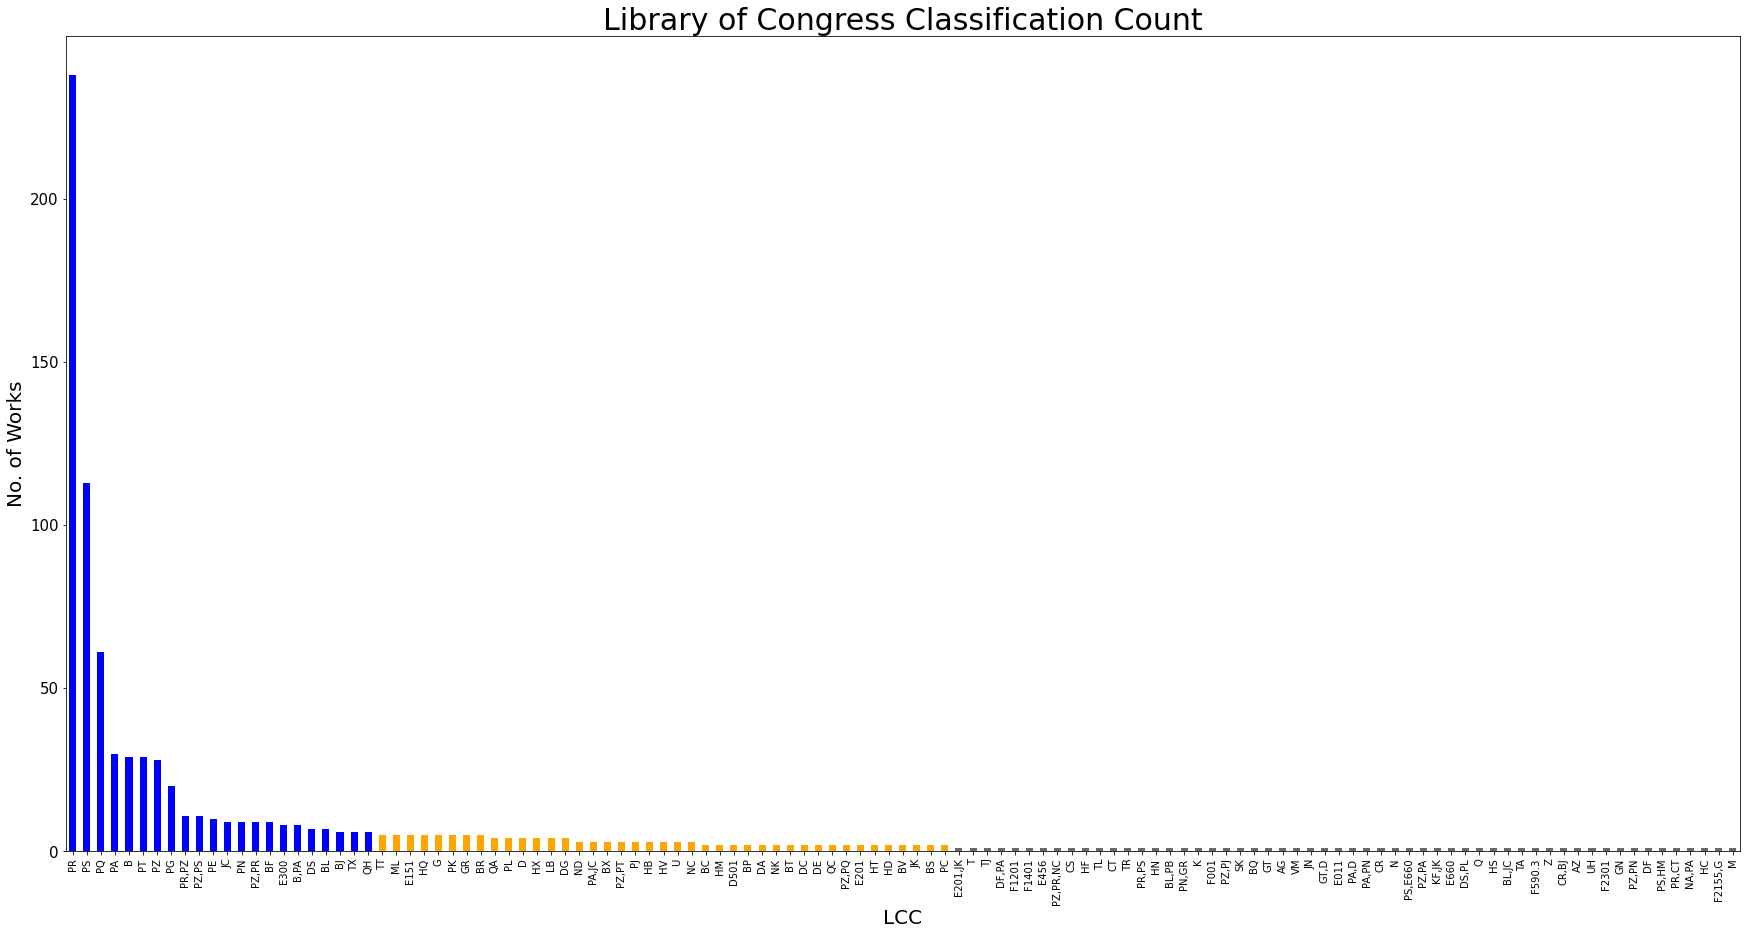

PR       238
PS       113
PQ        61
PA        30
B         29
PT        29
PZ        28
PG        20
PR,PZ     11
PZ,PS     11
PE        10
JC         9
PN         9
PZ,PR      9
BF         9
E300       8
B,PA       8
DS         7
BL         7
BJ         6
TX         6
QH         6
Name: LCC, dtype: int64

In [50]:
# go through LCC to find categories, make barplot of most common categories
plt.rcParams["figure.figsize"] = (30, 15)
# value_counts() auto drops NaN values
count = classics["LCC"].value_counts()
colors = []
for value in count:
    if value > 5:
        colors.append('b')
    elif 5>=value>1:
        colors.append('orange')
    else:
        colors.append('dimgrey')
Lcc_bar = count.plot.bar(color = colors)
Lcc_bar.set_xlabel("LCC", fontdict = {"fontsize" : 20})
Lcc_bar.set_ylabel("No. of Works", fontdict = {"fontsize" : 20})
Lcc_bar.set_title("Library of Congress Classification Count",fontdict = {"fontsize" : 30})
plt.xticks(rotation = "vertical")
plt.yticks(fontsize= 15)
plt.show()
count.loc[lambda x : x > 5]
    

The bar chart clearly shows that the most common classifications are by far **PR and PS**. Looking at the classification outlines below, the most common class is class P, Language and Literature.The prevalence of this class is understandable given that most classics are fiction, and are classified as literature. More surprising to me was the complete dominance of subclass PR, British literature, and PS, American literature. I expected there to be more English-language literature than other categories, but the data far exceeded my hypothesis. Other cultures with notable literary traditions, such as works written in Arabic (PJ), Indo-Iranian languages (PK), and East Asian languages (PL) **are not** heavily represented in the dataset. The only other notable class was **B**, Philosophy (general), with 29 works classified as such. Many of the most influential schools of thought in history originated as a result of philosophers, so it is logical to continue reading their works.These results do show a bias in the data as it skews heavily towards works written in English, and more broadly towards European literature (PQ, PA, PT). 

The main implication of this bias is that the books most commonly read and taught around the world are mainly of the Western literary canon. This finding supports the role that colonialism had in spreading culture throughout the world. The U.K., formerly "the empire on which the sun never sets", seems to have been the main beneficiary of cultural colonialism.


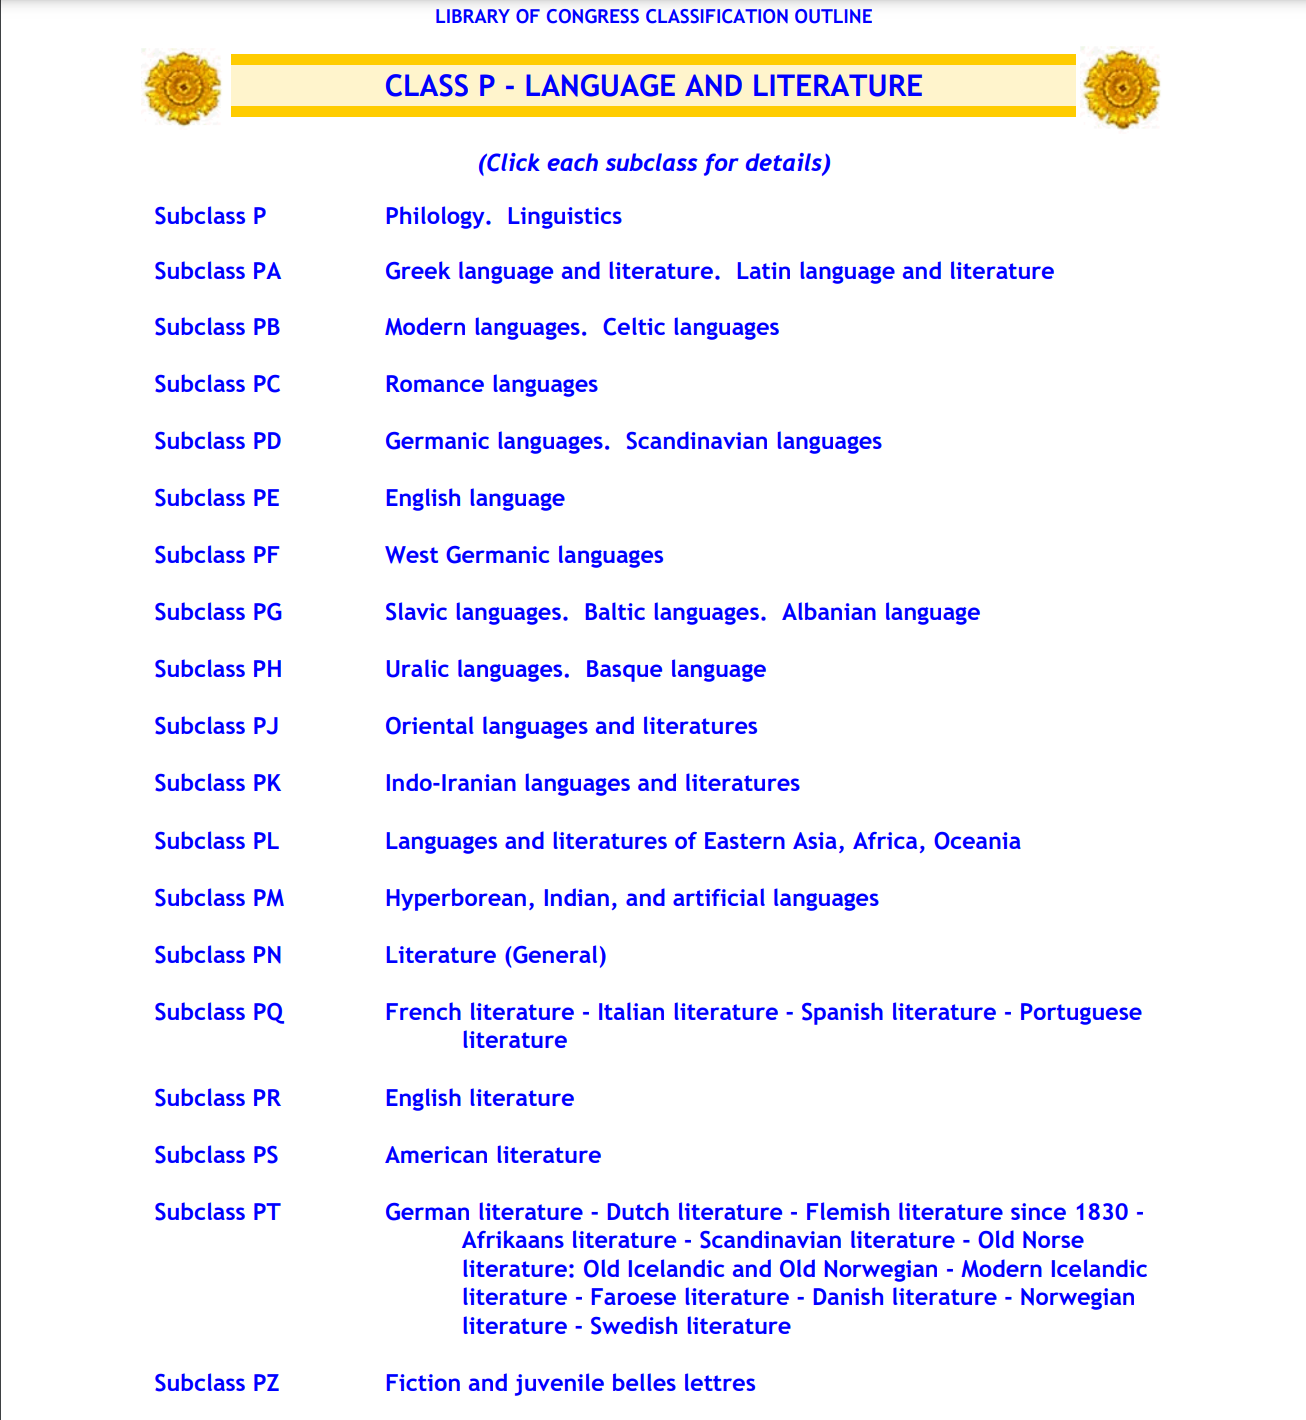

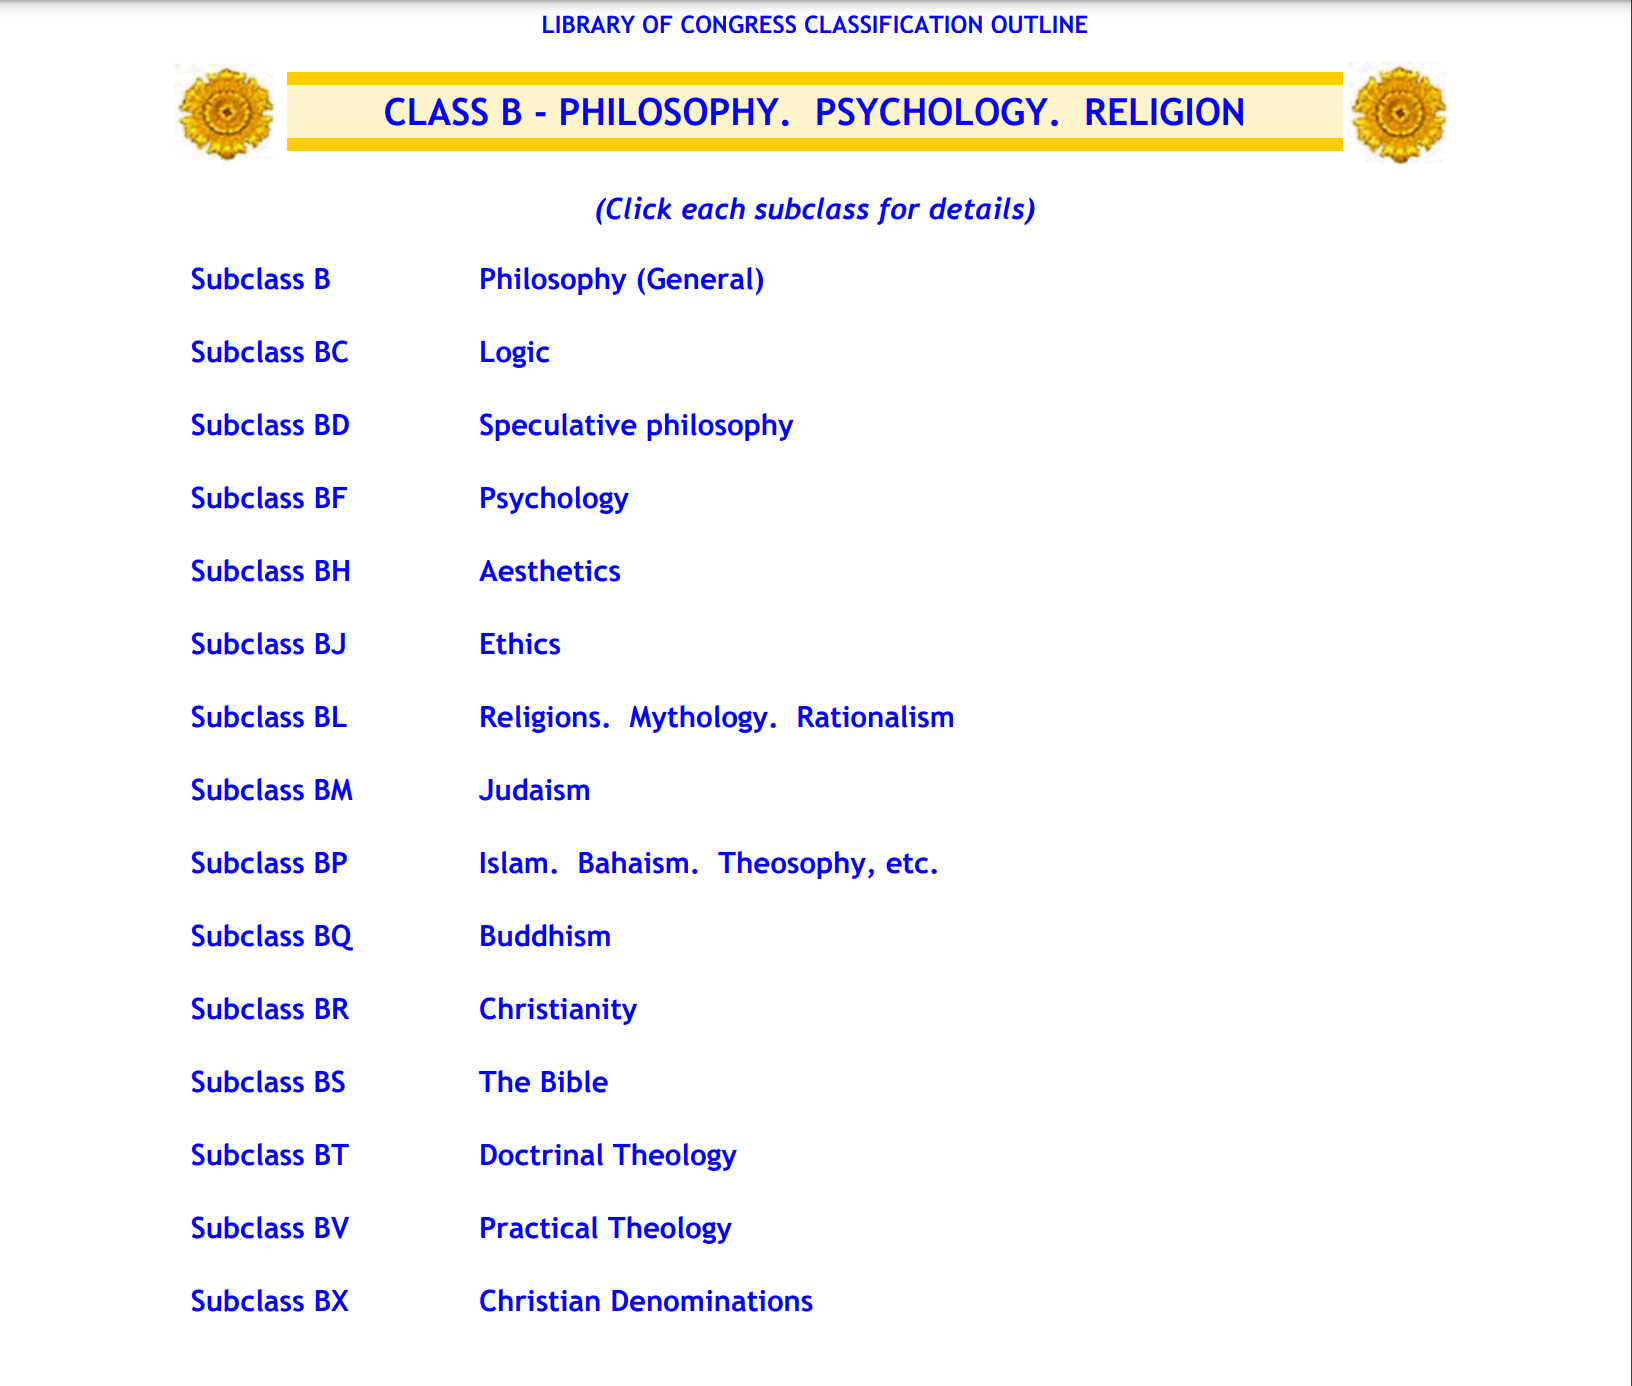

## Authors

The next avenue I chose to explore was that of the author. I wanted to find the most common authors and the time period their works were written in.

In [52]:
print(len(author_count.loc[lambda x : x > 2]))

80


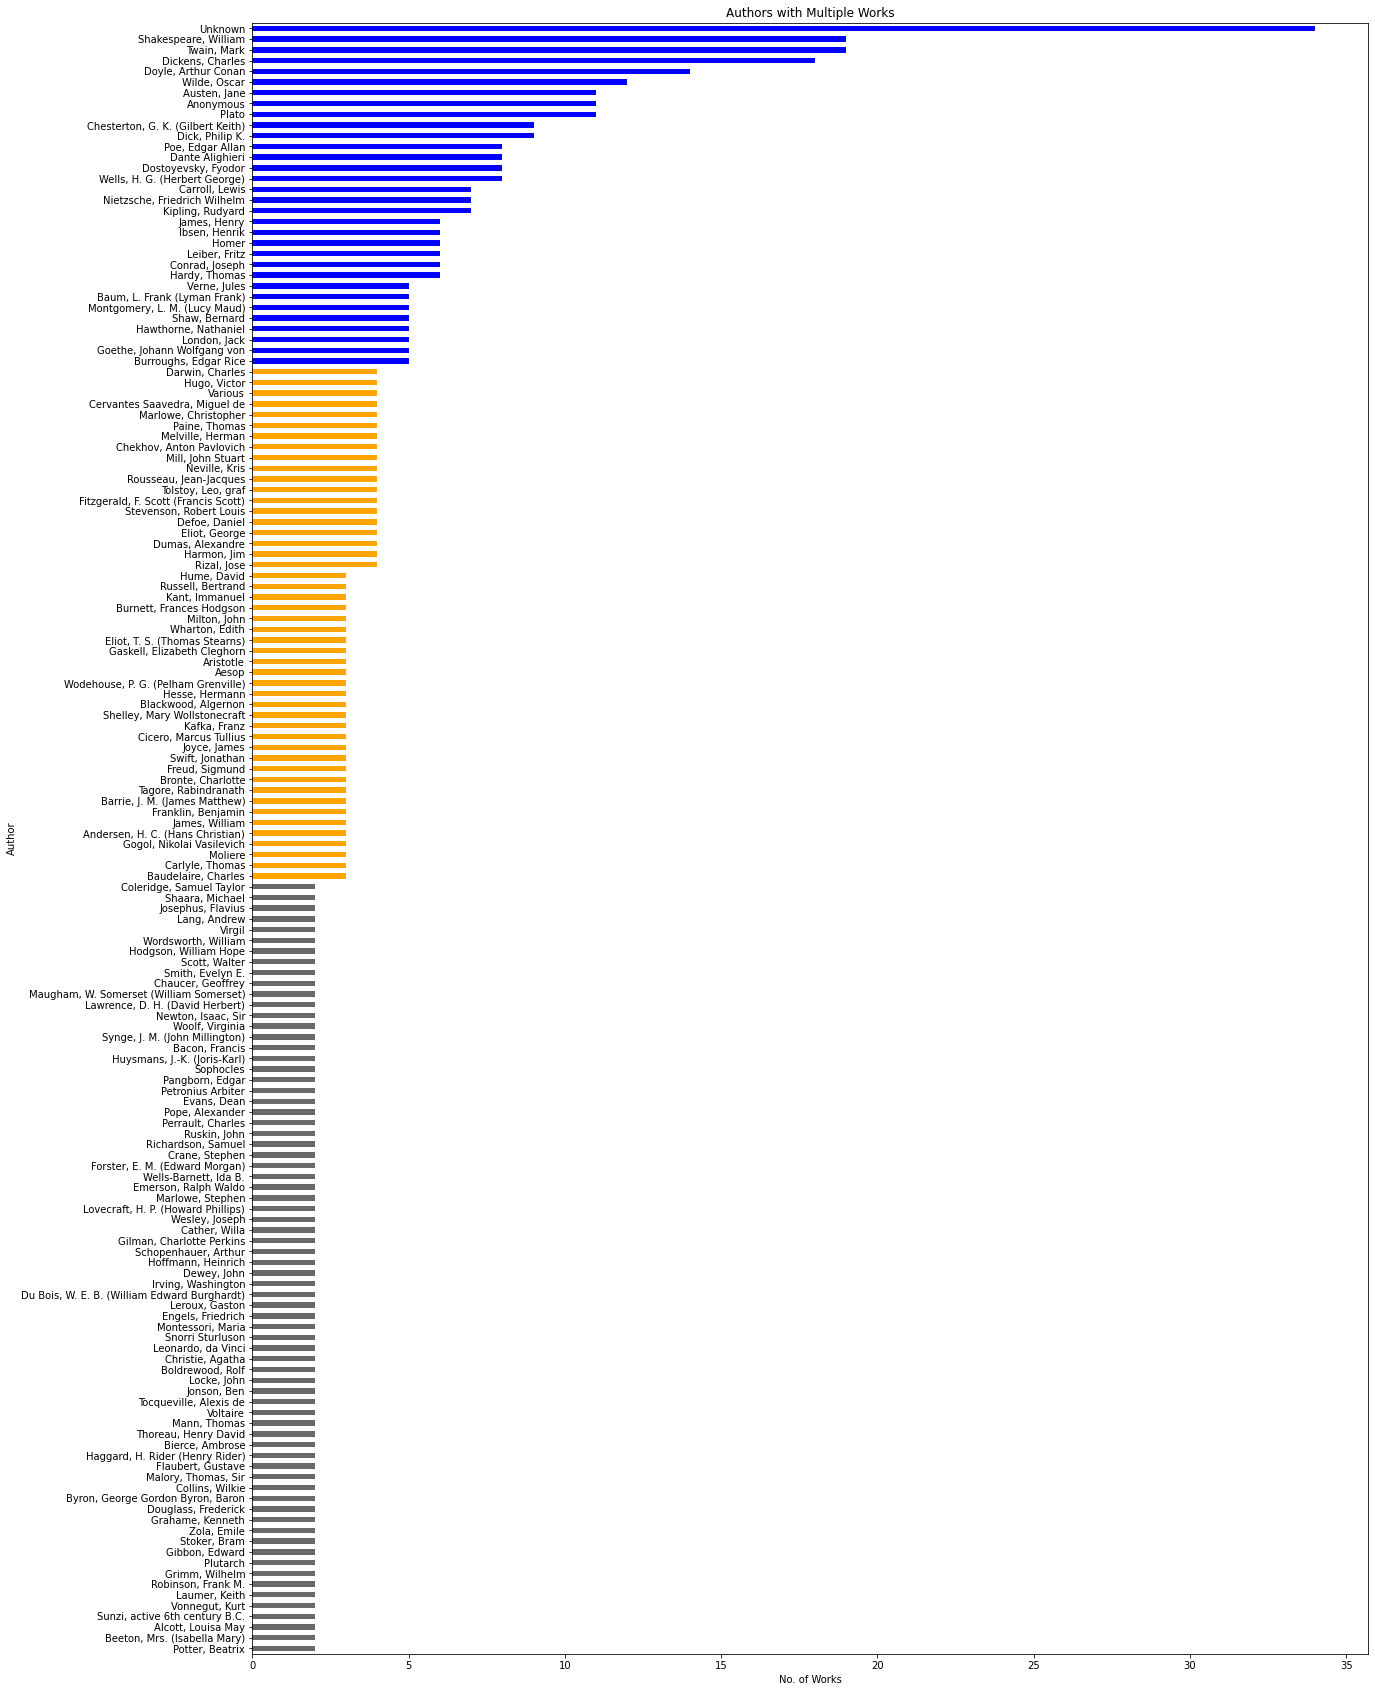

In [51]:
plt.rcParams["figure.figsize"] = (20, 30)
# value_counts() auto drops NaN values
author_count = classics["author"].value_counts()
colors = []
for value in author_count:
    if value >= 5:
        colors.append('b')
    elif value>2:
        colors.append('orange')
    else:
        colors.append('dimgrey')
auth_barh = author_count.loc[lambda x : x > 1].plot.barh(color= colors)
auth_barh.invert_yaxis()
auth_barh.set_xlabel("No. of Works")
auth_barh.set_ylabel("Author")
auth_barh.set_title("Authors with Multiple Works")
plt.xticks(rotation= "horizontal")
plt.show()

The bar chart here contains all 80 authors with 2 or more works listed in the dataset. Many of the familiar names are listed, eg., Shakespeare, Austen, Wilde, and Poe, but so are authors more regarded for their "genre fiction" e.g. Arthur Conan Doyle, Philip K. Dick, and Jack London. This contrast emphasizes the rise of commercial fiction in more recent years, as nearly all of the older authors listed wrote in what is now considered "literary fiction" while more recent works have a higher percentage of genre authors. 

## Time Period

In [53]:
classics[["title", "author","pubyear"]]

,title,author,pubyear
0,Pride and Prejudice,"Austen, Jane",1998
1,The Yellow Wallpaper,"Gilman, Charlotte Perkins",1999
2,Alice's Adventures in Wonderland,"Carroll, Lewis",1994
3,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",2008
4,Metamorphosis,"Kafka, Franz",2005
...,...,...,...
1001,The Reluctant Heroes,"Robinson, Frank M.",2016
1002,"Film Truth; September, 1920",Anonymous,2016
1003,Othmar,Ouida,2016
1004,Church History (Volumes 1-3),"Kurtz, J. H. (Johann Heinrich)",2016


Immediately, we can see a problem with the publication year: Jane Austen was definitely not alive in 1998. Clearly, the publication year is based on the edition available on Project Gutenberg and is not the original year of publication. Instead of using the publication year, I decided to take the author birth and death year information and average them, as the author likely would have written works while in the middle of their lifespan and that year can be roughly taken to represent the period in which they wrote. There are many flaws in this method, e.g., authors may have only been productive at the end of their life or only had their works recognized posthumously. However, in the absence of a more thorough dataset, judging the initial time period of the book's impact this way was reasonable.

In [105]:
plt.rcParams["figure.figsize"] = (10, 6)
time_df = classics[["author.birth","author.death", "metadata.rank"]]
time_df = time_df[(time_df != 0).all(1)]
time_df = time_df.assign(year=(time_df["author.birth"] + time_df["author.death"]) / 2)
time_df

,author.birth,author.death,metadata.rank,year
0,1775,1817,1,1796.0
1,1860,1935,2,1897.5
2,1832,1898,3,1865.0
3,1797,1851,4,1824.0
4,1883,1924,5,1903.5
...,...,...,...,...
995,1910,1992,996,1951.0
998,1845,1913,999,1879.0
1001,1926,2014,1002,1970.0
1003,1839,1908,1004,1873.5


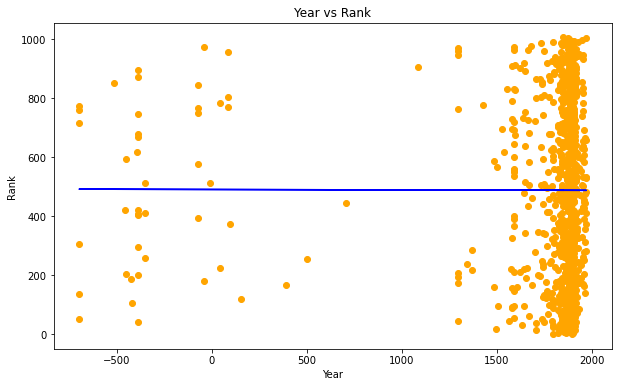

coefficient: [[-0.00148717]]


In [108]:
X = time_df[["year"]].values.reshape(-1,1)
y = time_df[["metadata.rank"]].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.scatter(X, y, color = 'orange')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Year vs Rank')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()
print("coefficient:", regressor.coef_)

median year: 1872.5 


Text(0.5, 1.0, 'Works grouped by Author Lifespan')

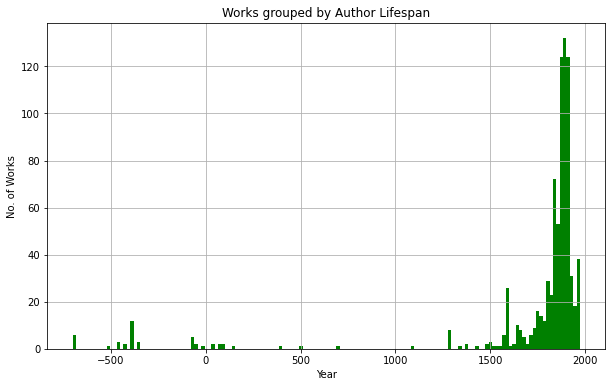

In [129]:
plt.rcParams["figure.figsize"] = (10, 6)
time_df.hist(column = "year", bins = 150, color = "green")
print("median year: % s " % (statistics.median(time_df["year"])))
plt.ylabel("No. of Works")
plt.xlabel("Year")
plt.title("Works grouped by Author Lifespan")

The median year is about 1872, in the late 19th century. By this point in history, much more of the population could read, especially in European countries, and there were thriving literary communities in major cities such as the French salons. More works were being published at this time, which implies that there would be more works of quality being published and preserved.

Text(0.5, 1.0, 'Works grouped by Author Lifespan from 1500')

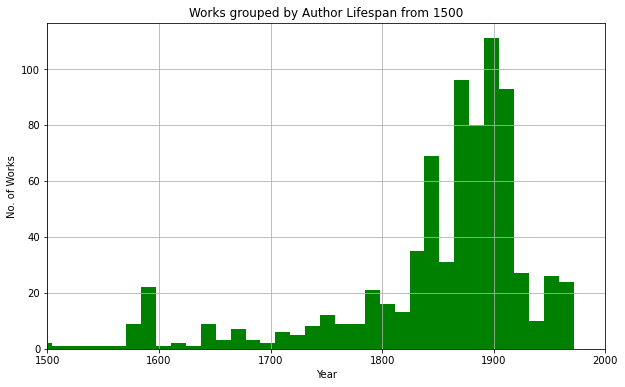

In [127]:
time_df.hist(column = "year", bins = 200, color = "green")
plt.xlim(1500,2000)
plt.ylabel("No. of Works")
plt.xlabel("Year")
plt.title("Works grouped by Author Lifespan from 1500")

## Complexity

Next, I decided to look at the complexity figures provided in the dataset. There were multiple indices that referenced years of education required to understand the work, so I focused on those.

In [64]:
# Using metrics that represent grade-level: The Automated Readability Index, Coleman Liau Index, Flesch-Kincaid Grade Level 
# Gunning-Fogg, Linsear
for i in range(len(classics)):
    metrics = [classics.loc[i,"ARI"],classics.loc[i,"CLI"],classics.loc[i,"FKG"],classics.loc[i,"GFI"],classics.loc[i,"LWF"]]
    avg_gl = statistics.mean(metrics)
    classics.loc[i, "avg grade level"] = avg_gl
    classics.insert(9, "avg grade level", classics.pop("avg grade level"))
classics

,LCC,subjects,title,downloads,metadata.rank,author.birth,author.death,author,pubyear,avg grade level,...,LWF,SMOG,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,36576,1,1775,1817,"Austen, Jane",1998,10.406,...,13.5,3.1,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,26363,2,1860,1935,"Gilman, Charlotte Perkins",1999,6.860,...,5.5,3.1,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",Fantasy,Alice's Adventures in Wonderland,18882,3,1832,1898,"Carroll, Lewis",1994,9.578,...,14.0,3.1,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",17128,4,1797,1851,"Shelley, Mary Wollstonecraft",2008,10.276,...,7.0,3.1,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,15683,5,1883,1924,"Kafka, Franz",2005,11.372,...,10.5,3.1,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,NaN,The Reluctant Heroes,0,1002,1926,2014,"Robinson, Frank M.",2016,6.056,...,5.0,3.1,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,NaN,"Film Truth; September, 1920",0,1003,0,0,Anonymous,2016,10.048,...,11.5,3.1,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,NaN,Othmar,0,1004,1839,1908,Ouida,2016,8.050,...,1.0,3.1,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,NaN,Church History (Volumes 1-3),0,1005,1809,1890,"Kurtz, J. H. (Johann Heinrich)",2016,9.004,...,2.0,8.8,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


median grade level: 10.280999999999999 
mean grade level: 10.829916500994036 


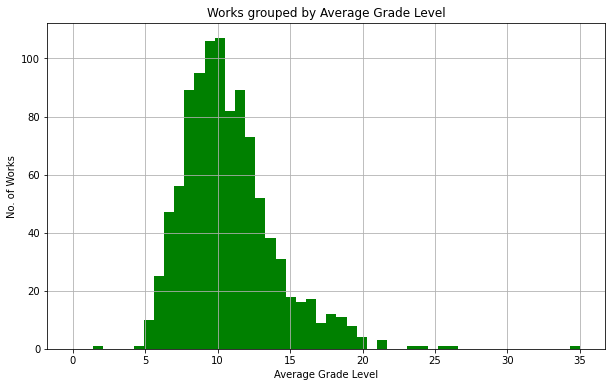

In [126]:
#average of all metrics
plt.rcParams["figure.figsize"] = (10, 6)
classics.hist(column = "avg grade level", bins = 50, color = "green", range = (0,35))
plt.ylabel("No. of Works")
plt.xlabel("Average Grade Level")
plt.title("Works grouped by Average Grade Level")
print("median grade level: % s " % (statistics.median(classics["avg grade level"])))
print("mean grade level: % s " % (statistics.mean(classics["avg grade level"])))

Based on the dataset, the median and mean grade level/years of education required to understand the classics is 10 or 11. Many of these works are introduced around that age in schools around the world. This grade level allows for mass comprehension while still remaining complex enough to explore the desired themes.

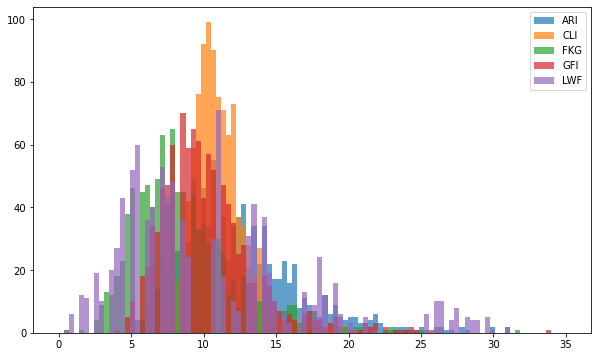

In [66]:
#all metrics independently
plt.hist(classics["ARI"], range = (0,35), bins=100, alpha=0.7, label="ARI")
plt.hist(classics["CLI"], range = (0,35), bins=100, alpha =0.7,label = "CLI")
plt.hist(classics["FKG"], range = (0,35), bins=100, alpha =0.7,label = "FKG")
plt.hist(classics["GFI"], range = (0,35), bins=100, alpha =0.7,label = "GFI")
plt.hist(classics["LWF"], range = (0,35), bins=100, alpha =0.7,label = "LWF")
plt.legend(loc='upper right')
plt.show()

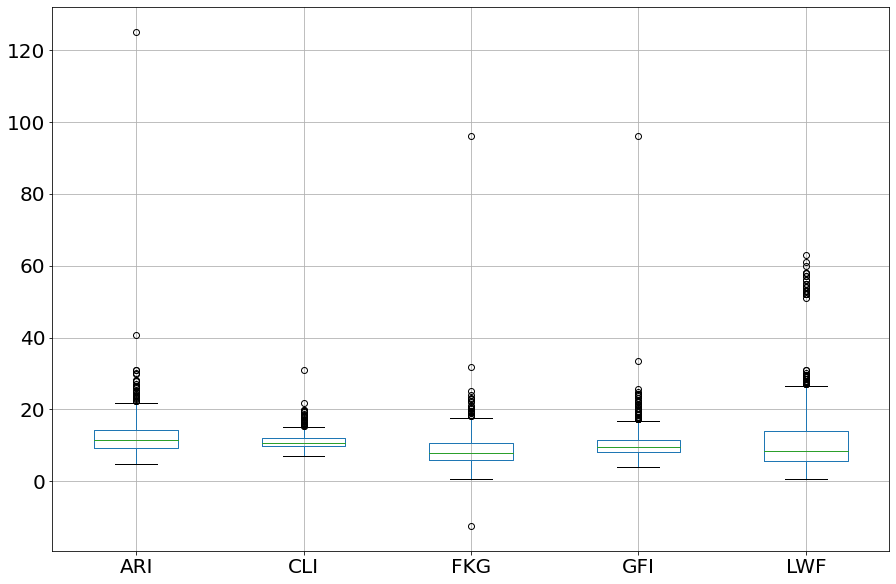

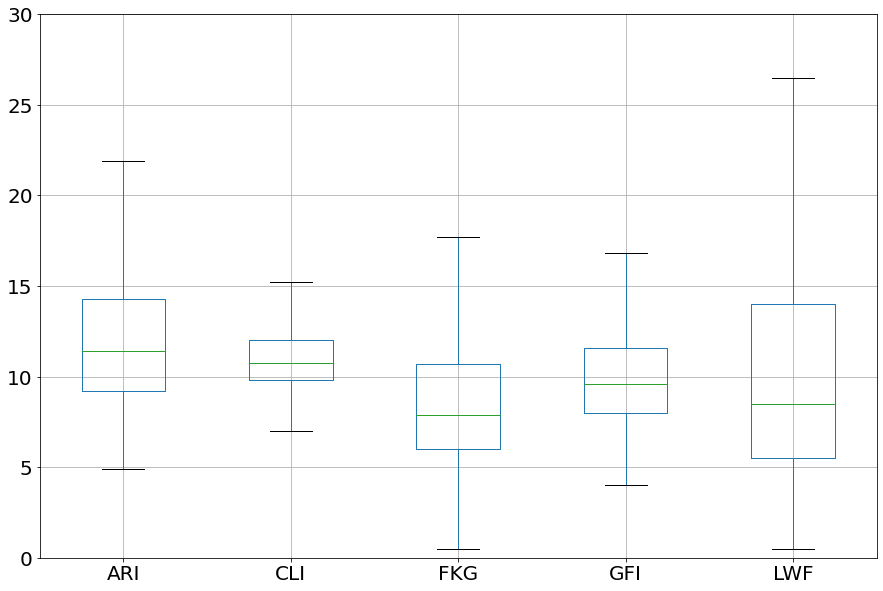

In [72]:
classics.boxplot(column =["ARI", "CLI", "FKG", "GFI", "LWF"], figsize = (15,10), fontsize = 20)
plt.show()
classics.boxplot(column =["ARI", "CLI", "FKG", "GFI", "LWF"], figsize = (15,10), fontsize = 20, showfliers=False)
plt.ylim((0,30))
plt.show()

The histogram and box plots show the interesting differences between each metric. CLI has a much narrower distribution, but the median is slightly higher than the other measures. It uses characters and sentences in its formula. On the other hand, the Linsear Write Formula has a far broader distribution from nearly 0 to 30. The Linsear Write Formula uses syllables, as do most of the other metrics in the dataset.

In [67]:
classics.sort_values("avg grade level", ascending = False)

,LCC,subjects,title,downloads,metadata.rank,author.birth,author.death,author,pubyear,avg grade level,...,LWF,SMOG,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
544,PE,English language -- Terms and phrases,Fifteen Thousand Useful Phrases: A Practical H...,717,545,1868,1953,"Kleiser, Grenville",2006,68.532,...,6.0,28.7,6.08,235.0,0.00,496119,7003,346,137055.6,81607
210,B,"Methodology,Science -- Methodology",Discourse on the Method of Rightly Conducting ...,1476,211,1596,1650,"Descartes, Rene",2008,34.480,...,55.0,13.0,4.74,79.0,0.01,109197,933,289,33185.7,23024
185,DF,"Greece -- History -- Peloponnesian War, 431-40...",The History of the Peloponnesian War,1605,186,-460,-395,Thucydides,2004,26.560,...,63.0,8.8,4.93,40.0,0.02,1010983,8137,5089,298561.5,205021
388,DS,Jews -- History,"The Wars of the Jews; Or, The History of the D...",917,389,37,0,"Josephus, Flavius",2009,25.710,...,52.0,8.8,4.68,48.0,0.02,1103961,6028,4837,323544.6,235699
693,F1401,"Spain -- Colonies -- America;Indians, Treatmen...",A Brief Account of the Destruction of the Indi...,570,694,1484,1566,"Casas, Bartolome de las",2007,24.134,...,29.5,8.8,5.08,56.0,0.02,158018,1080,548,44641.8,31078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,PR,"Bildungsromans,Autobiographical fiction,Englan...",Sons and Lovers,571,693,1885,1930,"Lawrence, D. H. (David Herbert)",2006,5.374,...,2.0,3.1,4.73,10.0,0.09,758330,2421,15010,204381.9,160203
765,PE,Readers,"McGuffey's First Eclectic Reader, Revised Edition",525,766,1800,1873,"McGuffey, William Holmes",2005,5.278,...,5.0,3.1,4.51,11.0,0.09,34174,118,653,8627.4,7573
643,PR,Kings and rulers -- Drama;Britons -- Drama;Tra...,The Tragedy of King Lear,609,644,1564,1616,"Shakespeare, William",1608,5.234,...,1.5,3.1,4.73,11.0,0.09,130143,274,2474,34220.7,27527
636,PS,"Science fiction,Short stories",Beyond Lies the Wub,615,637,1928,1982,"Dick, Philip K.",2009,4.794,...,2.5,3.1,4.90,7.0,0.13,13202,46,361,3479.4,2694


These metrics may not be entirely accurate. The lowest average grade level is a math workbook, and next is a science fiction short story, but third-lowest is King Lear, which is underrated in terms of **theme** complexity. The metrics only account for **sentence/word** complexity, which is reductionist when it comes to understanding literature.

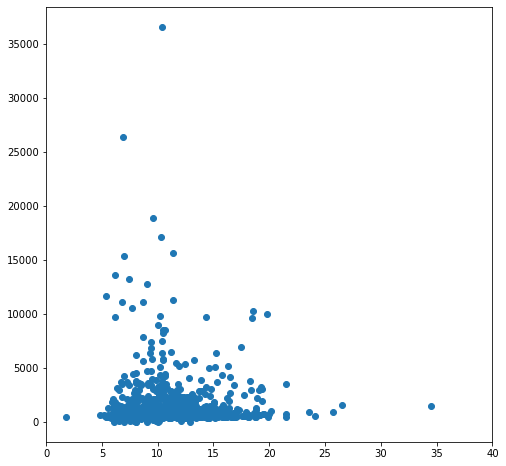

In [68]:
plt.figure(figsize=(8, 8))
dscatt = plt.scatter(classics["avg grade level"], classics["downloads"])
plt.xlim((0,40))
plt.show()

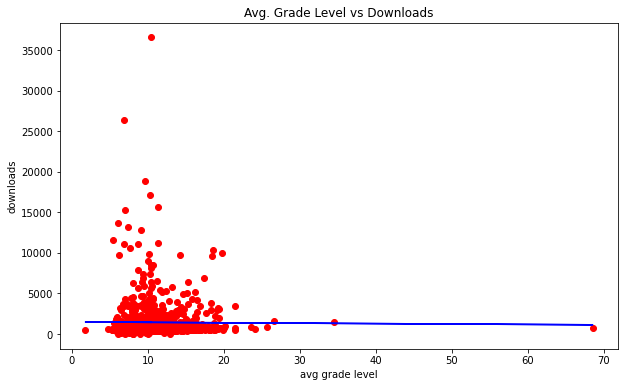

[[-5.14546455]]


In [69]:
X = classics[["avg grade level"]].values.reshape(-1,1)
y = classics[["downloads"]].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Avg. Grade Level vs Downloads')
plt.xlabel('avg grade level')
plt.ylabel('downloads')
plt.show()
print(regressor.coef_)

(0.0, 40.0)

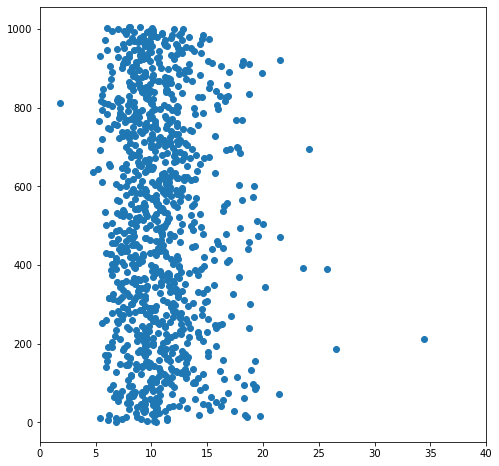

In [70]:
plt.figure(figsize=(8, 8))
rscatt = plt.scatter(classics["avg grade level"], classics["metadata.rank"])
plt.xlim((0,40))

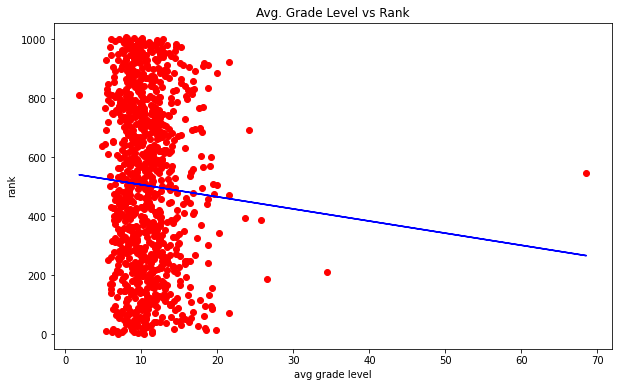

[[-4.10715376]]


In [71]:
X = classics[["avg grade level"]].values.reshape(-1,1)
y = classics[["metadata.rank"]].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Avg. Grade Level vs Rank')
plt.xlabel('avg grade level')
plt.ylabel('rank')
plt.show()
print(regressor.coef_)

## Genre/Subjects

Another key point of analysis is the genre or subjects covered in a book or short story. What topics separate literary fiction from other works?

In [73]:
na_df = classics[["title","author", "subjects"]]
na_df =  na_df.dropna(how='any',axis=0) # removing entries with no genre info
na_df

,title,author,subjects
0,Pride and Prejudice,"Austen, Jane","Sisters -- Fiction,Courtship -- Fiction,Social..."
1,The Yellow Wallpaper,"Gilman, Charlotte Perkins","Mentally ill women -- Fiction,Feminist fiction..."
2,Alice's Adventures in Wonderland,"Carroll, Lewis",Fantasy
3,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",Monsters -- Fiction;Frankenstein's monster (Fi...
4,Metamorphosis,"Kafka, Franz","Psychological fiction,Metamorphosis -- Fiction"
...,...,...,...
985,The Professor,"Bronte, Charlotte",Belgium -- Social life and customs -- 19th cen...
986,Russian Fairy Tales: A Choice Collection of Mu...,Unknown,Folklore -- Russia
987,"Beethoven, the Man and the Artist, as Revealed...","Beethoven, Ludwig van","Composers -- Germany -- Biography;Beethoven, L..."
988,Triplanetary,"Smith, E. E. (Edward Elmer)","Human-alien encounters -- Fiction,Science fict..."


In [74]:
print(type(na_df.iloc[850]["subjects"]))
na_df.iloc[850]["subjects"]

<class 'str'>


'Bible. New Testament -- History of Biblical events -- Fiction;Historical fiction;Tiberius, Emperor of Rome 42 B.C.-37 A.D. -- Fiction;Christian fiction;Rome -- History -- Tiberius, 14-37 -- Fiction;Jesus Christ -- Fiction'

In [75]:
# need to replace 'Fiction,', 'Drama,', 'Biography,', 'stories,' for standardization- using semicolons to separate
for i in range(len(na_df)): 
    na_df.iloc[i]["subjects"] = na_df.iloc[i]["subjects"].replace("Fiction,", "Fiction;").replace("Drama,", "Drama;").replace("Biography,", "Biography;").replace("stories,", ";").replace("fiction,", "fiction;")

na_df["subjects"][1]

'Mentally ill women -- Fiction;Feminist fiction;Psychological fiction;Married women -- Psychology -- Fiction;Sex role -- Fiction'

In [76]:
subj_str = ';'.join(na_df["subjects"].tolist())
subj_str

"Sisters -- Fiction;Courtship -- Fiction;Social classes -- Fiction;England -- Fiction;Domestic fiction;Young women -- Fiction;Love stories;Mentally ill women -- Fiction;Feminist fiction;Psychological fiction;Married women -- Psychology -- Fiction;Sex role -- Fiction;Fantasy;Monsters -- Fiction;Frankenstein's monster (Fictitious character) -- Fiction;Gothic fiction (Literary genre);Science fiction;Frankenstein, Victor (Fictitious character) -- Fiction;Scientists -- Fiction;Horror tales;Psychological fiction;Metamorphosis -- Fiction;Male friendship -- Fiction;Humorous stories;Missouri -- Fiction;Race relations -- Fiction;Bildungsromans;Finn, Huckleberry (Fictitious character) -- Fiction;Fugitive slaves -- Fiction;Mississippi River -- Fiction;Adventure stories;Runaway children -- Fiction;Boys -- Fiction;Identity (Psychology) -- Drama;Comedies,England -- Drama;Foundlings -- Drama;Male friendship -- Fiction;Humorous stories;Missouri -- Fiction;Child witnesses -- Fiction;Bildungsromans;Missi

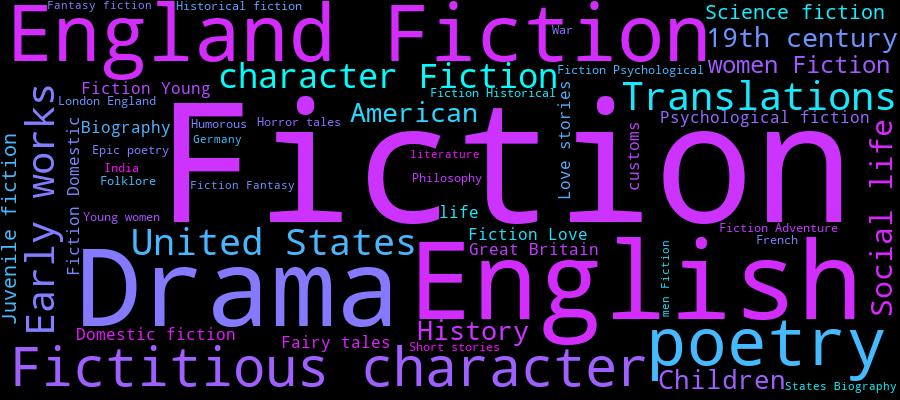

In [77]:
# Define a word cloud variable
cloud = WordCloud(background_color = "black", 
                  max_words = 50, 
                  contour_width = 20, 
                  width = 900, height = 400, 
                  random_state = 4,
                  colormap = "cool"
                 )

# Process the word cloud
cloud.generate(subj_str)

# Visualize!
cloud.to_image()

The most read works are fictional and in English. However, this is not quite what we were looking for in terms of actual subjects covered in the text.

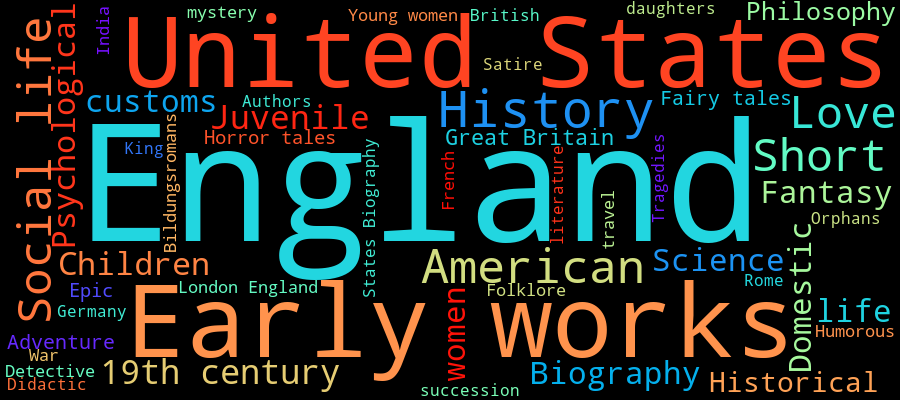

In [78]:
import nltk
from nltk.corpus import stopwords
categories = ["fiction", "drama", "poetry", "stories", "Translations", "English", "Fictitious", "character"]
# Define a word cloud variable
cloud = WordCloud(background_color = "black", 
                  max_words = 50, 
                  contour_width = 5, 
                  width = 900, height = 400, 
                  random_state = 6,
                  colormap = "rainbow",
                  stopwords = stopwords.words('english') + categories
                 )
# Process the word cloud
cloud.generate(subj_str)

# Visualize!
cloud.to_image()

Now we get a more detailed view. England and the United States are clearly the most common settings for classics. We can see that on aggregate, a classic work likely revolves around **social life, history, and love** while also containing **psychological** elements.

# Network Analysis

In [1186]:
na_df["subjects"][1]

#print(type(na_df["subjects"][0]))

'Mentally ill women -- Fiction;Feminist fiction;Psychological fiction;Married women -- Psychology -- Fiction;Sex role -- Fiction'

In [1187]:
# convert subjects column into lists, then split into multiple rows
for i in range(len(na_df)): 
    na_df.iloc[i]["subjects"] = list(na_df.iloc[i]["subjects"].split(";"))
new_df = na_df.explode("subjects")
new_df

,title,author,subjects
0,Pride and Prejudice,"Austen, Jane",Sisters -- Fiction
0,Pride and Prejudice,"Austen, Jane",Courtship -- Fiction
0,Pride and Prejudice,"Austen, Jane",Social classes -- Fiction
0,Pride and Prejudice,"Austen, Jane",England -- Fiction
0,Pride and Prejudice,"Austen, Jane",Domestic fiction
...,...,...,...
989,Ben-Hur; a tale of the Christ,"Wallace, Lew",Historical fiction
989,Ben-Hur; a tale of the Christ,"Wallace, Lew","Tiberius, Emperor of Rome 42 B.C.-37 A.D. -- F..."
989,Ben-Hur; a tale of the Christ,"Wallace, Lew",Christian fiction
989,Ben-Hur; a tale of the Christ,"Wallace, Lew","Rome -- History -- Tiberius, 14-37 -- Fiction"


In [1188]:
# df for network simplification
real_df = new_df.drop("author", axis = 1)
real_df

,title,subjects
0,Pride and Prejudice,Sisters -- Fiction
0,Pride and Prejudice,Courtship -- Fiction
0,Pride and Prejudice,Social classes -- Fiction
0,Pride and Prejudice,England -- Fiction
0,Pride and Prejudice,Domestic fiction
...,...,...
989,Ben-Hur; a tale of the Christ,Historical fiction
989,Ben-Hur; a tale of the Christ,"Tiberius, Emperor of Rome 42 B.C.-37 A.D. -- F..."
989,Ben-Hur; a tale of the Christ,Christian fiction
989,Ben-Hur; a tale of the Christ,"Rome -- History -- Tiberius, 14-37 -- Fiction"


In [1189]:
real_df
for i in range(len(real_df)):
    if i > len(real_df):
        break
    elif real_df.iloc[i]["title"] not in books:
        print(real_df.iloc[i]["title"] + " is not here")
        real_df = real_df[real_df.title != real_df.iloc[i]["title"]]
real_df

Leviathan is not here
The Strange Case of Dr. Jekyll and Mr. Hyde is not here
Treasure Island is not here
Wuthering Heights is not here
Heart of Darkness is not here
The Count of Monte Cristo, Illustrated is not here
The Awakening, and Selected Short Stories is not here
Peter Pan is not here
Siddhartha is not here
The Life and Adventures of Robinson Crusoe is not here
The Divine Comedy by Dante, Illustrated is not here
A Christmas Carol in Prose; Being a Ghost Story of Christmas is not here
A Study in Scarlet is not here
The Jungle Book is not here
The Iliad is not here
Beyond Good and Evil is not here
Pygmalion is not here
Oliver Twist is not here
An Occurrence at Owl Creek Bridge is not here
The King James Version of the Bible is not here
My Secret Life, Volumes I. to III.: 1888 Edition is not here
The Hound of the Baskervilles is not here
Three Men in a Boat is not here
The Time Machine is not here
The Interesting Narrative of the Life of Olaudah Equiano, Or Gustavus Vassa, The Afri

The Great God Pan is not here
The Works of the Right Honourable Edmund Burke, Vol. 01 (of 12) is not here
The Man Who Was Thursday: A Nightmare is not here
The History of Herodotus — Volume 1 is not here
Arms and the Man is not here
Plays by Anton Chekhov, Second Series is not here
The Duchess of Malfi is not here
King Solomon's Mines is not here
What Men Live By, and Other Tales is not here
Der Struwwelpeter: oder lustige Geschichten und drollige Bilder is not here
The Possessed (The Devils) is not here
The Journals of Lewis and Clark, 1804-1806 is not here
The Iron Heel is not here
A Journal of the Plague Year: Written by a Citizen Who Continued All the While in London is not here
Bushido, the Soul of Japan is not here
Nationalism is not here
Anne of the Island is not here
Villette is not here
The Mysterious Island is not here
The Man in the Iron Mask is not here
Opticks: Or, A Treatise of the Reflections, Refractions, Inflections, and Colours of Light is not here
The Gilded Age: A T

King Richard III is not here
The Adventure of the Cardboard Box is not here
Foods That Will Win The War And How To Cook Them (1918) is not here
The Moon and Sixpence is not here
Riders to the Sea is not here
As You Like It is not here
Aeneidos is not here
The St. Gregory Hymnal and Catholic Choir Book is not here
Ghost Stories of an Antiquary is not here
Martin Chuzzlewit is not here
The Professor is not here
Beethoven, the Man and the Artist, as Revealed in His Own Words is not here
Triplanetary is not here
Ben-Hur; a tale of the Christ is not here


,title,subjects
0,Pride and Prejudice,Sisters -- Fiction
0,Pride and Prejudice,Courtship -- Fiction
0,Pride and Prejudice,Social classes -- Fiction
0,Pride and Prejudice,England -- Fiction
0,Pride and Prejudice,Domestic fiction
...,...,...
972,Viking Tales,"Sagas -- Adaptations,Vikings -- Folklore"
975,"Theodicy: Essays on the Goodness of God, the F...","Theodicy,Theism,Free will and determinism"
977,Beeton's Book of Needlework,"Crocheting,Needlework -- Patterns,Knitting,Lac..."
983,The Ballad of Reading Gaol,"Prisons -- Poetry,Imprisonment -- Poetry,Priso..."


In [1190]:
# Make list of most representedunique genres/authors for network graph
b =30
books = na_df["title"][:b].tolist()
books


['Pride and Prejudice',
 'The Yellow Wallpaper',
 "Alice's Adventures in Wonderland",
 'Frankenstein; Or, The Modern Prometheus',
 'Metamorphosis',
 'Adventures of Huckleberry Finn',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People',
 'The Adventures of Tom Sawyer',
 'Narrative of the Life of Frederick Douglass, an American Slave',
 "A Doll's House : a play",
 'Moby Dick; Or, The Whale',
 'The Adventures of Sherlock Holmes',
 'Great Expectations',
 'Ulysses',
 'A Tale of Two Cities',
 'A Modest Proposal: For preventing the children of poor people in Ireland, from being a burden on their parents or country, and for making them beneficial to the publick',
 'Dracula',
 'The Prince',
 'The Picture of Dorian Gray',
 'War and Peace',
 "Grimms' Fairy Tales",
 'The Kama Sutra of Vatsyayana: Translated From the Sanscrit in Seven Parts With Preface, Introduction and Concluding Remarks',
 'Emma',
 'Beowulf: An Anglo-Saxon Epic Poem',
 'Les Misérables',
 'The Romance of Lust:

In [1191]:
real_df.loc[0:b-1]

,title,subjects
0,Pride and Prejudice,Sisters -- Fiction
0,Pride and Prejudice,Courtship -- Fiction
0,Pride and Prejudice,Social classes -- Fiction
0,Pride and Prejudice,England -- Fiction
0,Pride and Prejudice,Domestic fiction
...,...,...
29,Sense and Sensibility,Regency fiction
29,Sense and Sensibility,Inheritance and succession -- Fiction
29,Sense and Sensibility,Domestic fiction
29,Sense and Sensibility,Young women -- Fiction


In [1192]:
real_df = real_df.loc[0:b-1]
real_df

,title,subjects
0,Pride and Prejudice,Sisters -- Fiction
0,Pride and Prejudice,Courtship -- Fiction
0,Pride and Prejudice,Social classes -- Fiction
0,Pride and Prejudice,England -- Fiction
0,Pride and Prejudice,Domestic fiction
...,...,...
29,Sense and Sensibility,Regency fiction
29,Sense and Sensibility,Inheritance and succession -- Fiction
29,Sense and Sensibility,Domestic fiction
29,Sense and Sensibility,Young women -- Fiction


In [1193]:
n =20
#genres = list(real_df["subjects"].value_counts()[:n].index.tolist())
genres = list(real_df["subjects"].value_counts()[:20].index.tolist()) #[lambda x : x > 4]
genres

['Psychological fiction',
 'Young women -- Fiction',
 'Love stories',
 'Historical fiction',
 'Bildungsromans,England -- Fiction',
 'Adventure stories',
 'Male friendship -- Fiction',
 'Mate selection -- Fiction',
 'Missouri -- Fiction',
 'Bildungsromans',
 'Runaway children -- Fiction',
 'Boys -- Fiction',
 'Sisters -- Fiction',
 'Fathers and daughters -- Fiction',
 'Ex-convicts -- Fiction',
 'Orphans -- Fiction',
 'Married people -- Fiction',
 'Dublin (Ireland) -- Fiction',
 'Humorous stories',
 'War stories']

<class 'list'>
{'Fathers and daughters -- Fiction', 'Love stories', 'Married people -- Fiction', 'Missouri -- Fiction', 'Humorous stories', 'Orphans -- Fiction', 'Sisters -- Fiction', 'Adventure stories', 'Bildungsromans', 'Mate selection -- Fiction', 'Dublin (Ireland) -- Fiction', 'Boys -- Fiction', 'Historical fiction', 'Psychological fiction', 'Runaway children -- Fiction', 'Ex-convicts -- Fiction', 'War stories', 'Young women -- Fiction', 'Male friendship -- Fiction', 'Bildungsromans,England -- Fiction'}
['Pride and Prejudice', 'The Yellow Wallpaper', "Alice's Adventures in Wonderland", 'Frankenstein; Or, The Modern Prometheus', 'Metamorphosis', 'Adventures of Huckleberry Finn', 'The Importance of Being Earnest: A Trivial Comedy for Serious People', 'The Adventures of Tom Sawyer', 'Narrative of the Life of Frederick Douglass, an American Slave', "A Doll's House : a play", 'Moby Dick; Or, The Whale', 'The Adventures of Sherlock Holmes', 'Great Expectations', 'Ulysses', 'A Tale of Tw

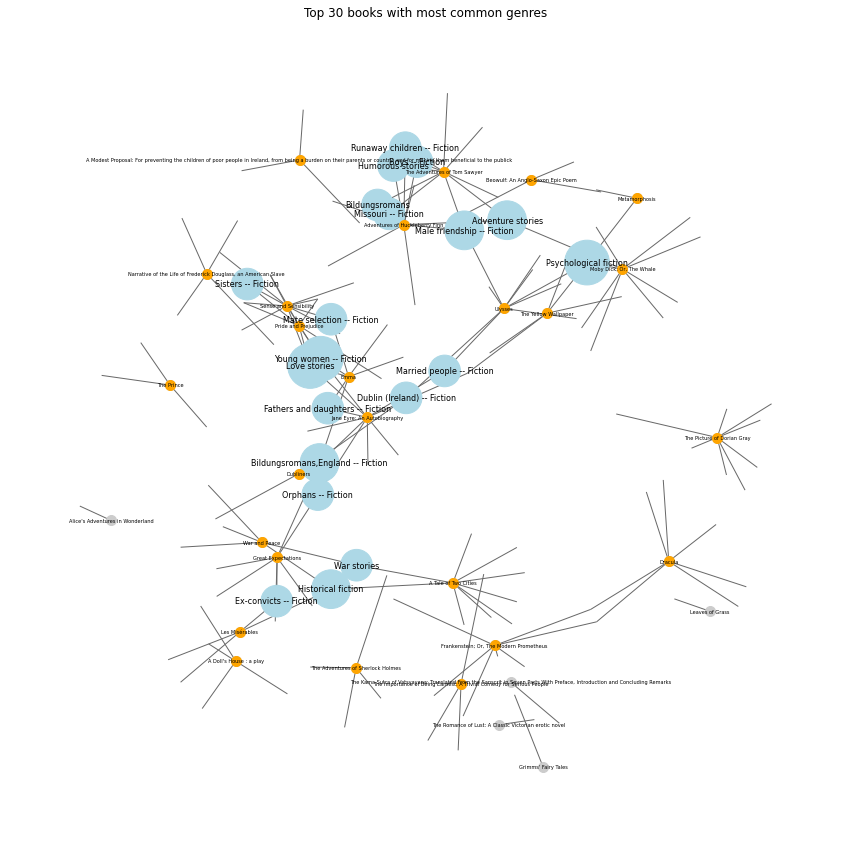

In [1216]:
import networkx as nx

plt.figure(figsize=(15,15))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(real_df, source='title', target='subjects') 

edges = []
print(type(real_df["subjects"].tolist()))
subj_list = real_df["subjects"].tolist()
print(set(subj_list).intersection(genres))
print(books)
#print(subj_list[1])
#print(subj_list[1] in genres)
for u in range(len(subj_list)):
    if bool(subj_list[u] in set(subj_list).intersection(genres)) == False:
        edges.append(subj_list[u])
#print(edges)
g.remove_edges_from(edges)

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=30,scale=2, k=.15) # k for distance btwn nodes

genre_freq = [g.degree(genre)*500 for genre in genres]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=genres, 
                       node_size=genre_freq, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities-simplified with small amount of books 
nx.draw_networkx_nodes(g, layout, nodelist=books, node_color='#cccccc', node_size=100)

# books w/ multiple genres
mults = [title for title in books if g.degree(title) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=mults, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="dimgrey")

genre_labels = dict(zip(genres, genres)) #labels for genres
book_labels = dict(zip(books, books)) #labels for books

nx.draw_networkx_labels(g, layout, labels=genre_labels, font_size = 8)
nx.draw_networkx_labels(g, layout, labels=book_labels, font_size = 5)


# No axis needed
plt.axis('off')
plt.title("Top 30 books with most common genres")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

This network represents the 30 most popular books with the 20 most common genres among them. Almost all of the genres found in the genre word cloud also make an appearance here. We also see a grouping of topics based on the novels that occupy multiple subgenres.

Young women, Love stories, Mate selection, Sisters (Austen)

Ex-cons, Historical, War stories, Bildungsromans (Dickens)

Runaway children, Boys, Adventure, Bildungsromans (Twain)

# Conclusion

Overall, it seems clear that historically, literature has been dominated by the English language, which is likely to continue as English has become the world's lingua franca. Genres concerning societal relationships of all kinds have been and are likely to remain popular, especially as questions of identity become more prominent. Though location information was not available in this dataset, I expect that literature in the future will become more diverse in author origin as more of the world has access to education and publishing.
